In [1]:
import json
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import randrange
from nltk.corpus import stopwords
import string
import spacy

In [2]:
#!conda install -c anaconda nltk

In [3]:
import numpy

In [4]:
import nltk
#nltk.download()

## Tokenization and Stemming

In [5]:
ps = PorterStemmer()
with open('reviewSamples20.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")
print(f)

<_io.TextIOWrapper name='reviewSamples20.json' mode='r' encoding='cp1252'>


In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#!pip install numpy

In [8]:
# Select random review and business_id
m = randrange(len(data))
business_id_1 = data[m]['business_id']
business_id_1
#business_id_1 = "2xrpo-LXV9uGIwpvy0dwUw"

'6sATfFam9_q9uod0I2aCsg'

In [9]:
#Extract all the reviews and form a small dataset
preStem = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_1):
        text = str(data[j]['text']).lower()
        word = word_tokenize(text)
        preStem.extend(word)

In [10]:
filtered_preStem = [w for w in preStem if not w in string.punctuation]
print(filtered_preStem)

['i', 'really', 'enjoyed', 'my', 'visit', 'here', 'everything', 'was', 'visually', 'appealing', 'to', 'me', 'ambiance', 'was', 'great', 'food', 'tasted', 'amazing', 'service', 'was', 'no', 'complaints', 'at', 'all']


In [11]:
# Stemming
stems = [ps.stem(w) for w in filtered_preStem]
print(stems)

['i', 'realli', 'enjoy', 'my', 'visit', 'here', 'everyth', 'wa', 'visual', 'appeal', 'to', 'me', 'ambianc', 'wa', 'great', 'food', 'tast', 'amaz', 'servic', 'wa', 'no', 'complaint', 'at', 'all']


In [12]:
#showing the word frequency distribution
freq_dist = FreqDist(filtered_preStem)
freq_dist = dict(freq_dist)
freq_dist = pd.Series(freq_dist)
freq_dist.sort_values(ascending=False, inplace=True)
freq_dist

was           3
i             1
ambiance      1
at            1
complaints    1
no            1
service       1
amazing       1
tasted        1
food          1
great         1
me            1
really        1
to            1
appealing     1
visually      1
everything    1
here          1
visit         1
my            1
enjoyed       1
all           1
dtype: int64

In [13]:
stemmed_freq_dist = FreqDist(stems)
stemmed_freq_dist = dict(stemmed_freq_dist)
stemmed_freq_dist = pd.Series(stemmed_freq_dist)
stemmed_freq_dist.sort_values(ascending=False, inplace=True)
stemmed_freq_dist

wa           3
i            1
ambianc      1
at           1
complaint    1
no           1
servic       1
amaz         1
tast         1
food         1
great        1
me           1
realli       1
to           1
appeal       1
visual       1
everyth      1
here         1
visit        1
my           1
enjoy        1
all          1
dtype: int64

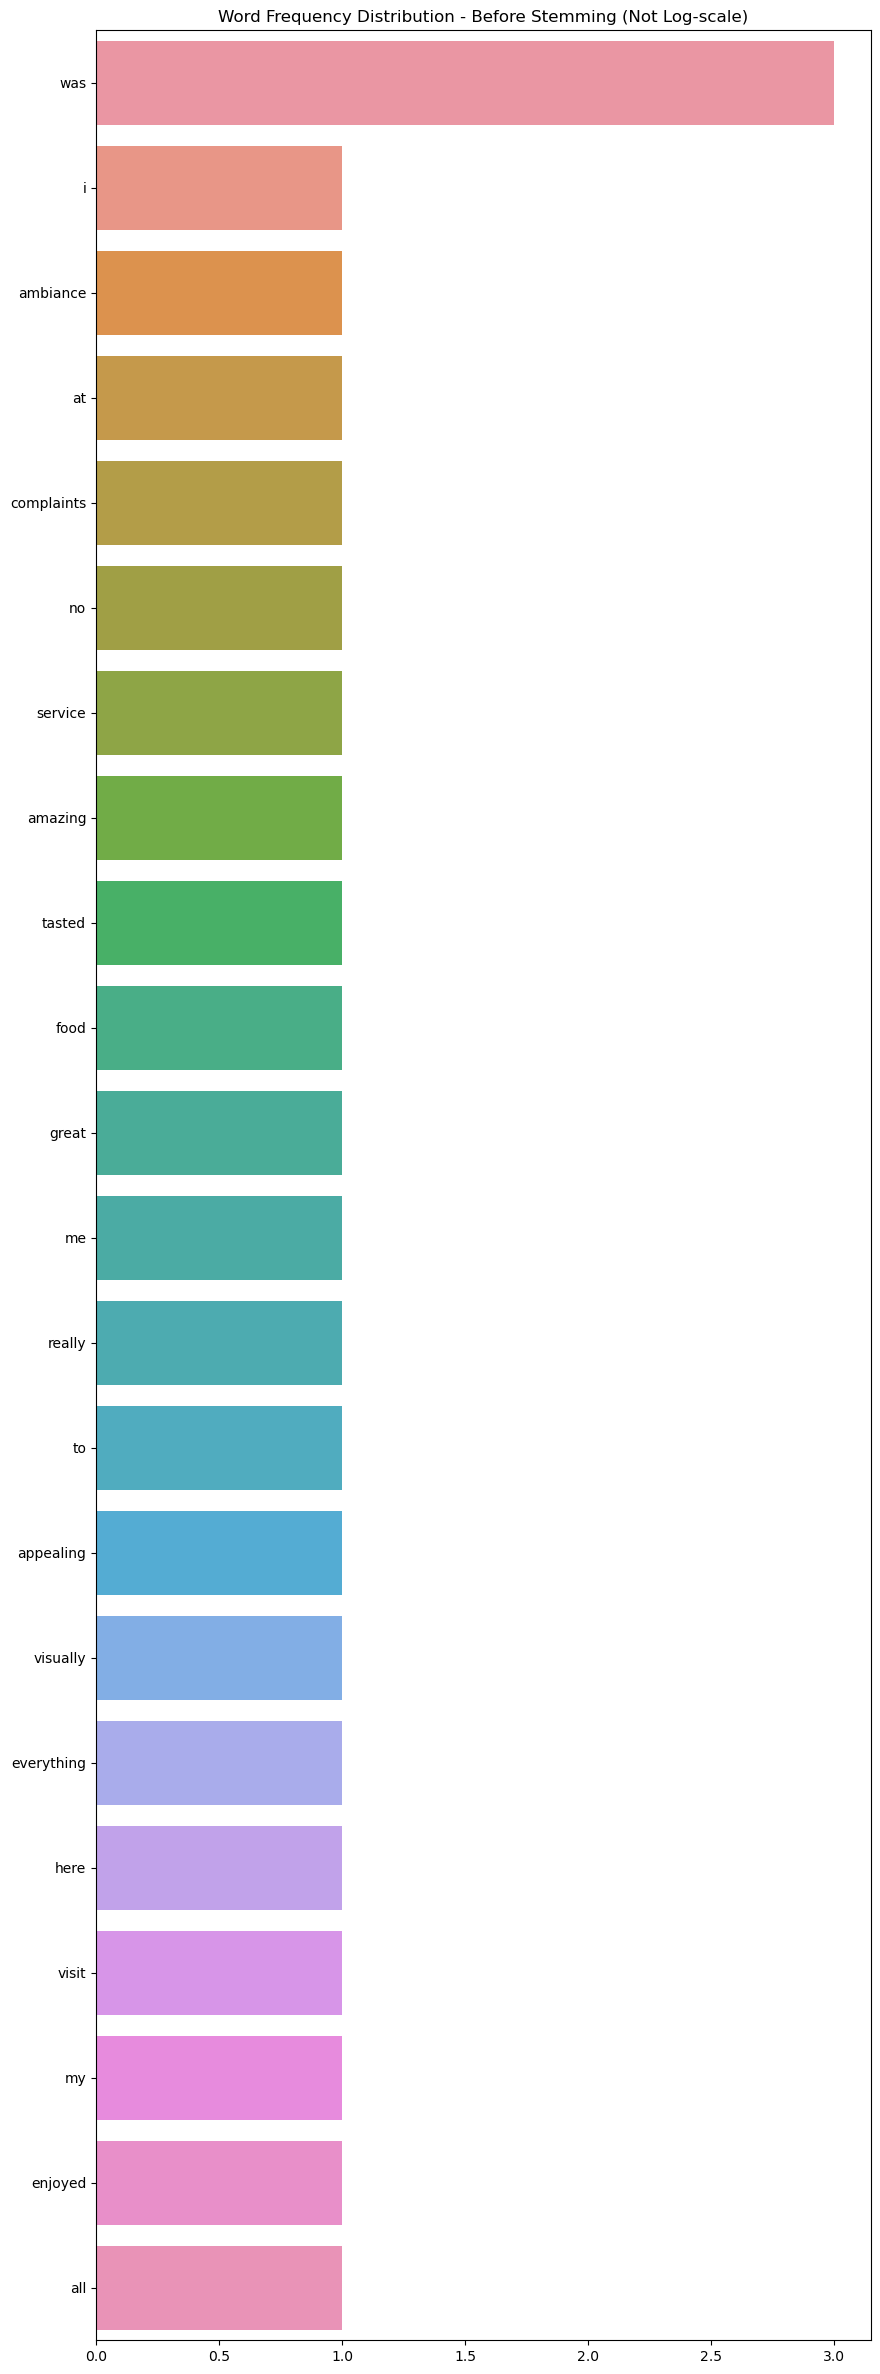

In [14]:
#notice that this one does not work well on 've 
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=freq_dist.values, y=freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()
plt.savefig('wordFreqBeforeStemming.png')

<Figure size 640x480 with 0 Axes>

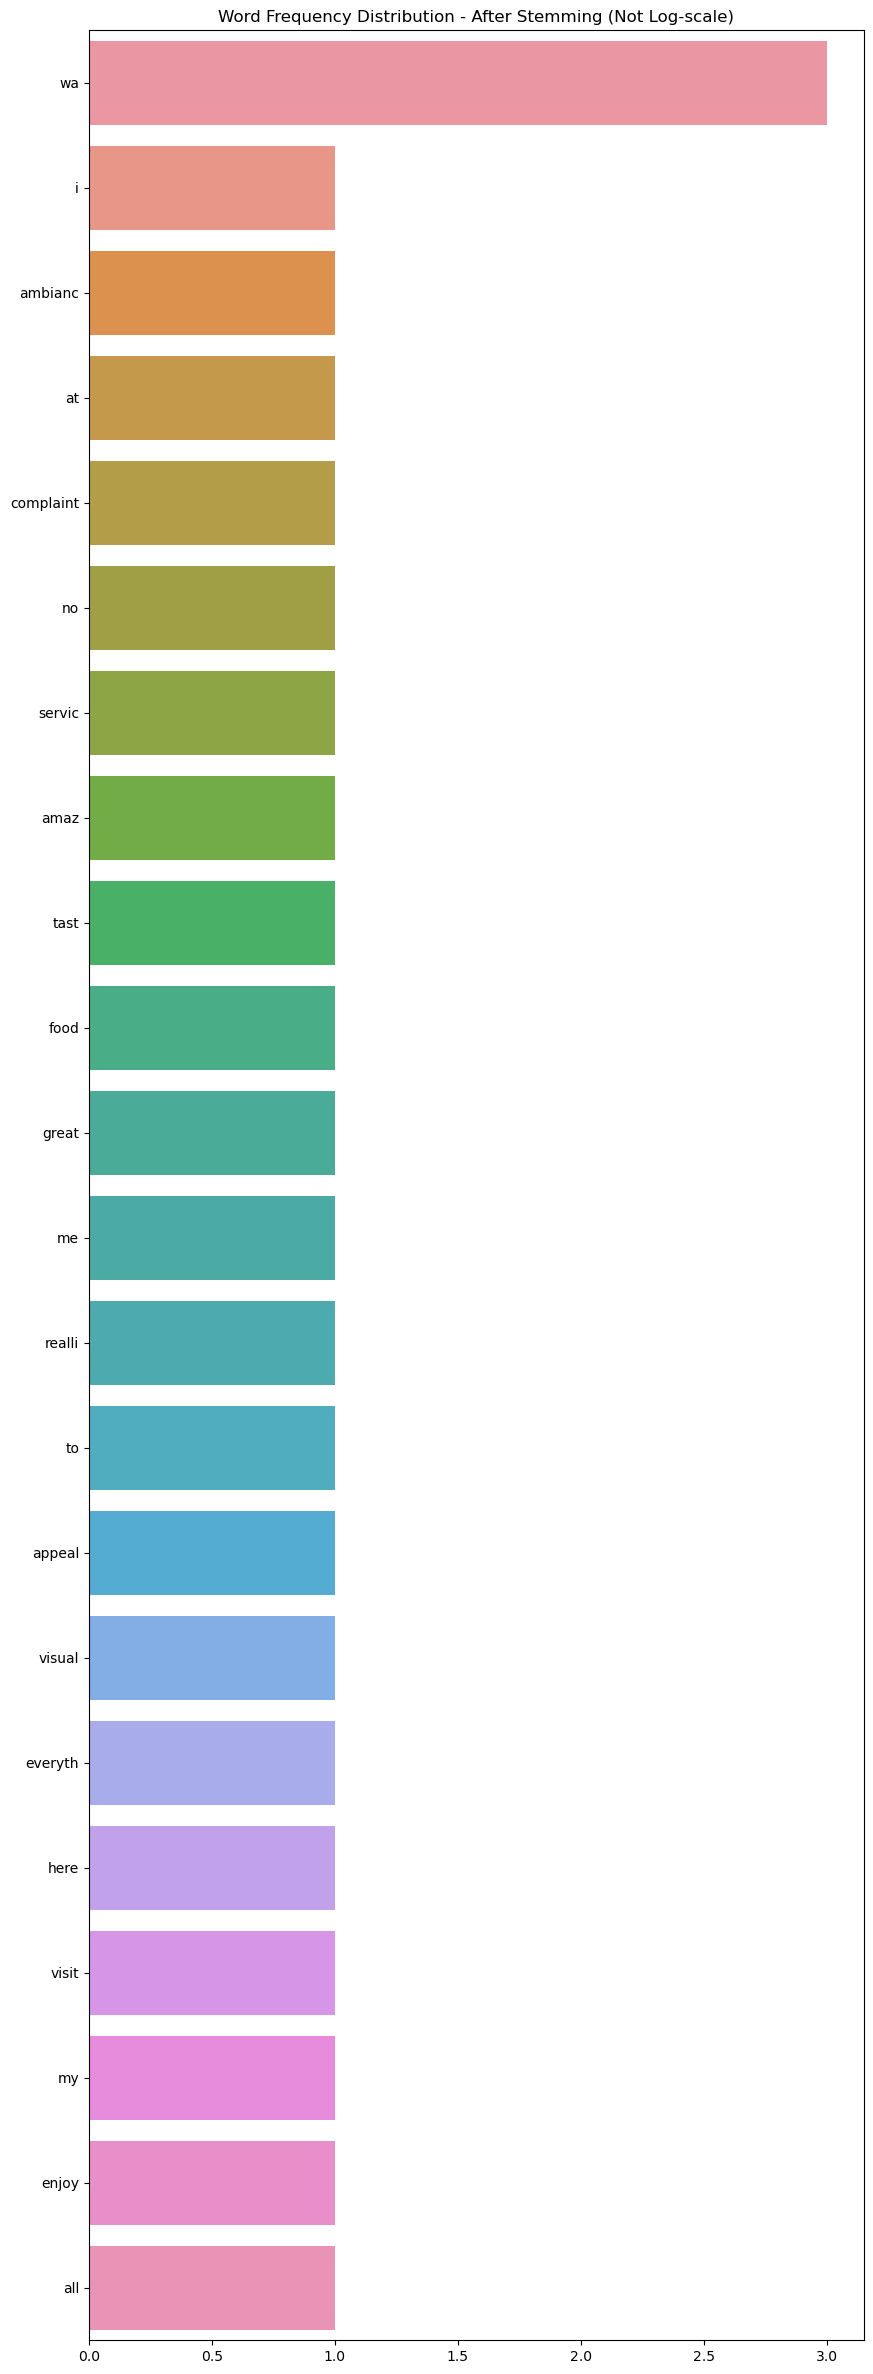

In [15]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=stemmed_freq_dist.values, y=stemmed_freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - After Stemming (Not Log-scale)")
plt.show()

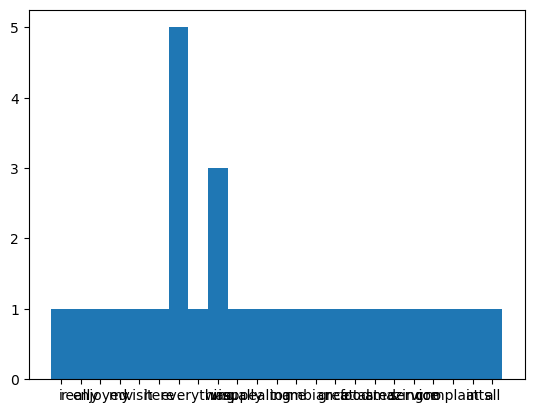

In [16]:
counts = Counter(preStem).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

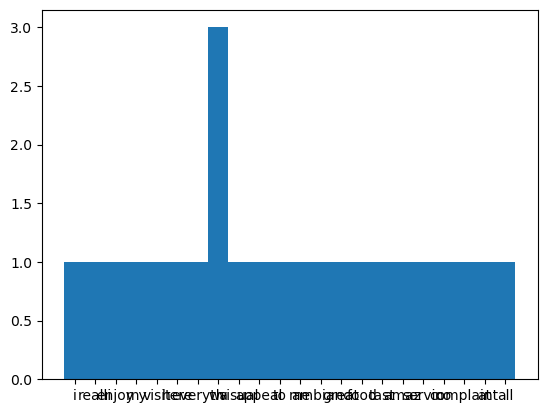

In [17]:
counts = Counter(stems).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

In [18]:
# Select a second random business
i = randrange(len(data))
business_id_2 = data[i]['business_id']
business_id_2

'Nc7cqq5k0WZsVhu25QrmNQ'

In [19]:
preStem_2 = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_2):
        text = str(data[j]['text']).lower()
        words = word_tokenize(text)
        preStem_2.extend(words)

In [20]:
filtered_preStem_2 = [w for w in preStem_2 if not w in string.punctuation]
# Stemming
stems_2 = [ps.stem(w) for w in filtered_preStem_2]
stems_2

['the',
 'gang',
 'at',
 'sun',
 'valley',
 'stereo',
 'is',
 'definit',
 'top',
 'notch',
 'ryan',
 'get',
 'right',
 'to',
 'the',
 'point',
 'and',
 'saw',
 'what',
 'i',
 'wa',
 'interest',
 'in',
 'and',
 'we',
 'work',
 'togeth',
 'to',
 'verifi',
 'that',
 'all',
 'the',
 'part',
 'were',
 'in',
 'to',
 'upgrad',
 'my',
 '2004',
 'rx-8',
 'with',
 'a',
 'pioneer',
 '4000nex',
 'touchscreen',
 'and',
 'back-up',
 'camera',
 'befor',
 'i',
 'drove',
 '90',
 'minut',
 'for',
 'the',
 'work',
 'when',
 'i',
 'first',
 'left',
 'there',
 'wa',
 'some',
 'adjust',
 'need',
 'they',
 'took',
 'me',
 'back',
 'in',
 'without',
 'hesit',
 'and',
 'made',
 'everyth',
 'right',
 'the',
 'instal',
 'wa',
 'commit',
 'to',
 'treat',
 'my',
 'car',
 'like',
 'it',
 'wa',
 'hi',
 'own',
 'he',
 'took',
 'the',
 'extra',
 'step',
 'to',
 'make',
 'it',
 'all',
 'right',
 'and',
 'even',
 'fix',
 'the',
 'hatch',
 'door',
 'to',
 'my',
 '12-volt',
 'socket',
 'now',
 'that',
 "'s",
 'go',
 'the'

In [21]:
freq_dist_2 = FreqDist(filtered_preStem_2)
freq_dist_2 = dict(freq_dist_2)
freq_dist_2 = pd.Series(freq_dist_2)
freq_dist_2.sort_values(ascending=False, inplace=True)
freq_dist_2

the        8
to         6
and        5
was        4
right      3
          ..
rx-8       1
2004       1
upgrade    1
were       1
6-stars    1
Length: 85, dtype: int64

In [22]:
stemmed_freq_dist_2 = FreqDist(stems_2)
stemmed_freq_dist_2 = dict(stemmed_freq_dist_2)
stemmed_freq_dist_2 = pd.Series(stemmed_freq_dist_2)
stemmed_freq_dist_2.sort_values(ascending=False, inplace=True)
stemmed_freq_dist_2

the       8
to        6
and       5
wa        4
my        3
         ..
with      1
rx-8      1
2004      1
upgrad    1
6-star    1
Length: 84, dtype: int64

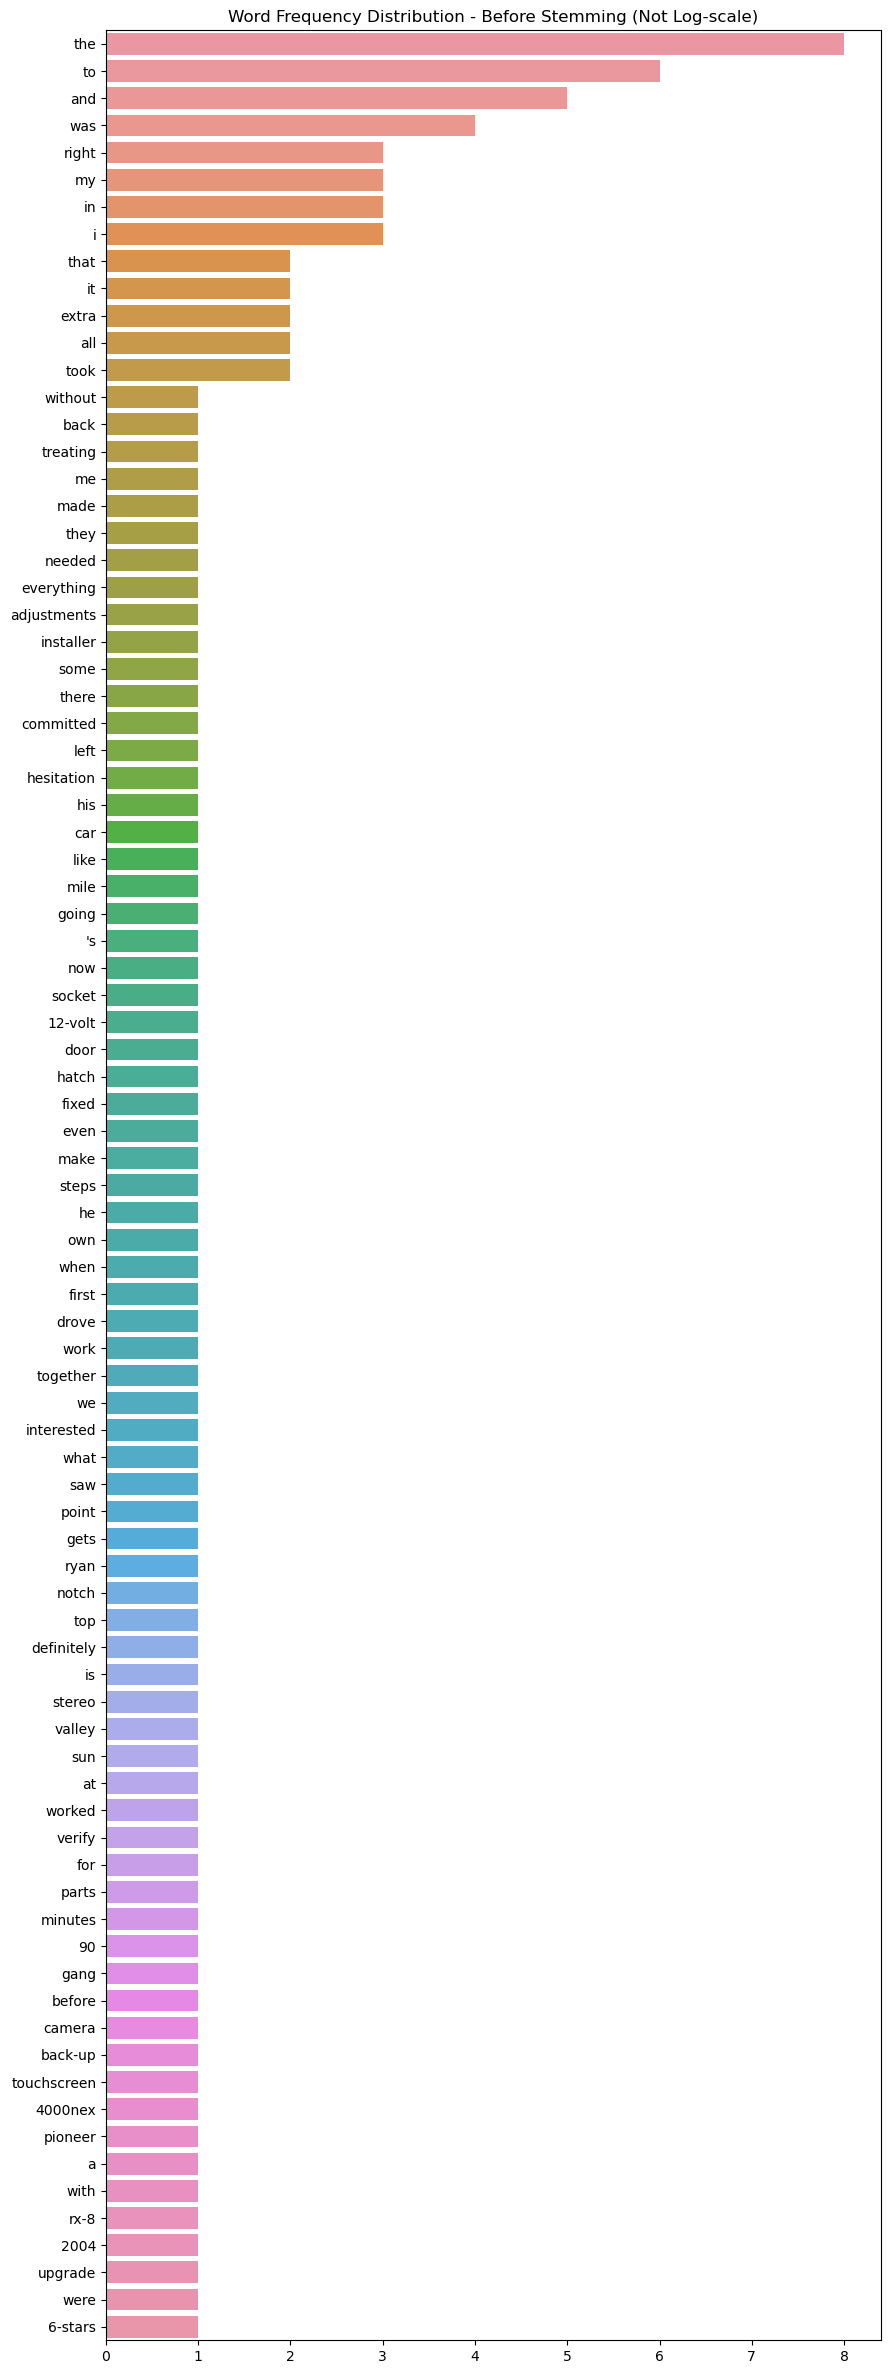

In [23]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=freq_dist_2.values, y=freq_dist_2.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

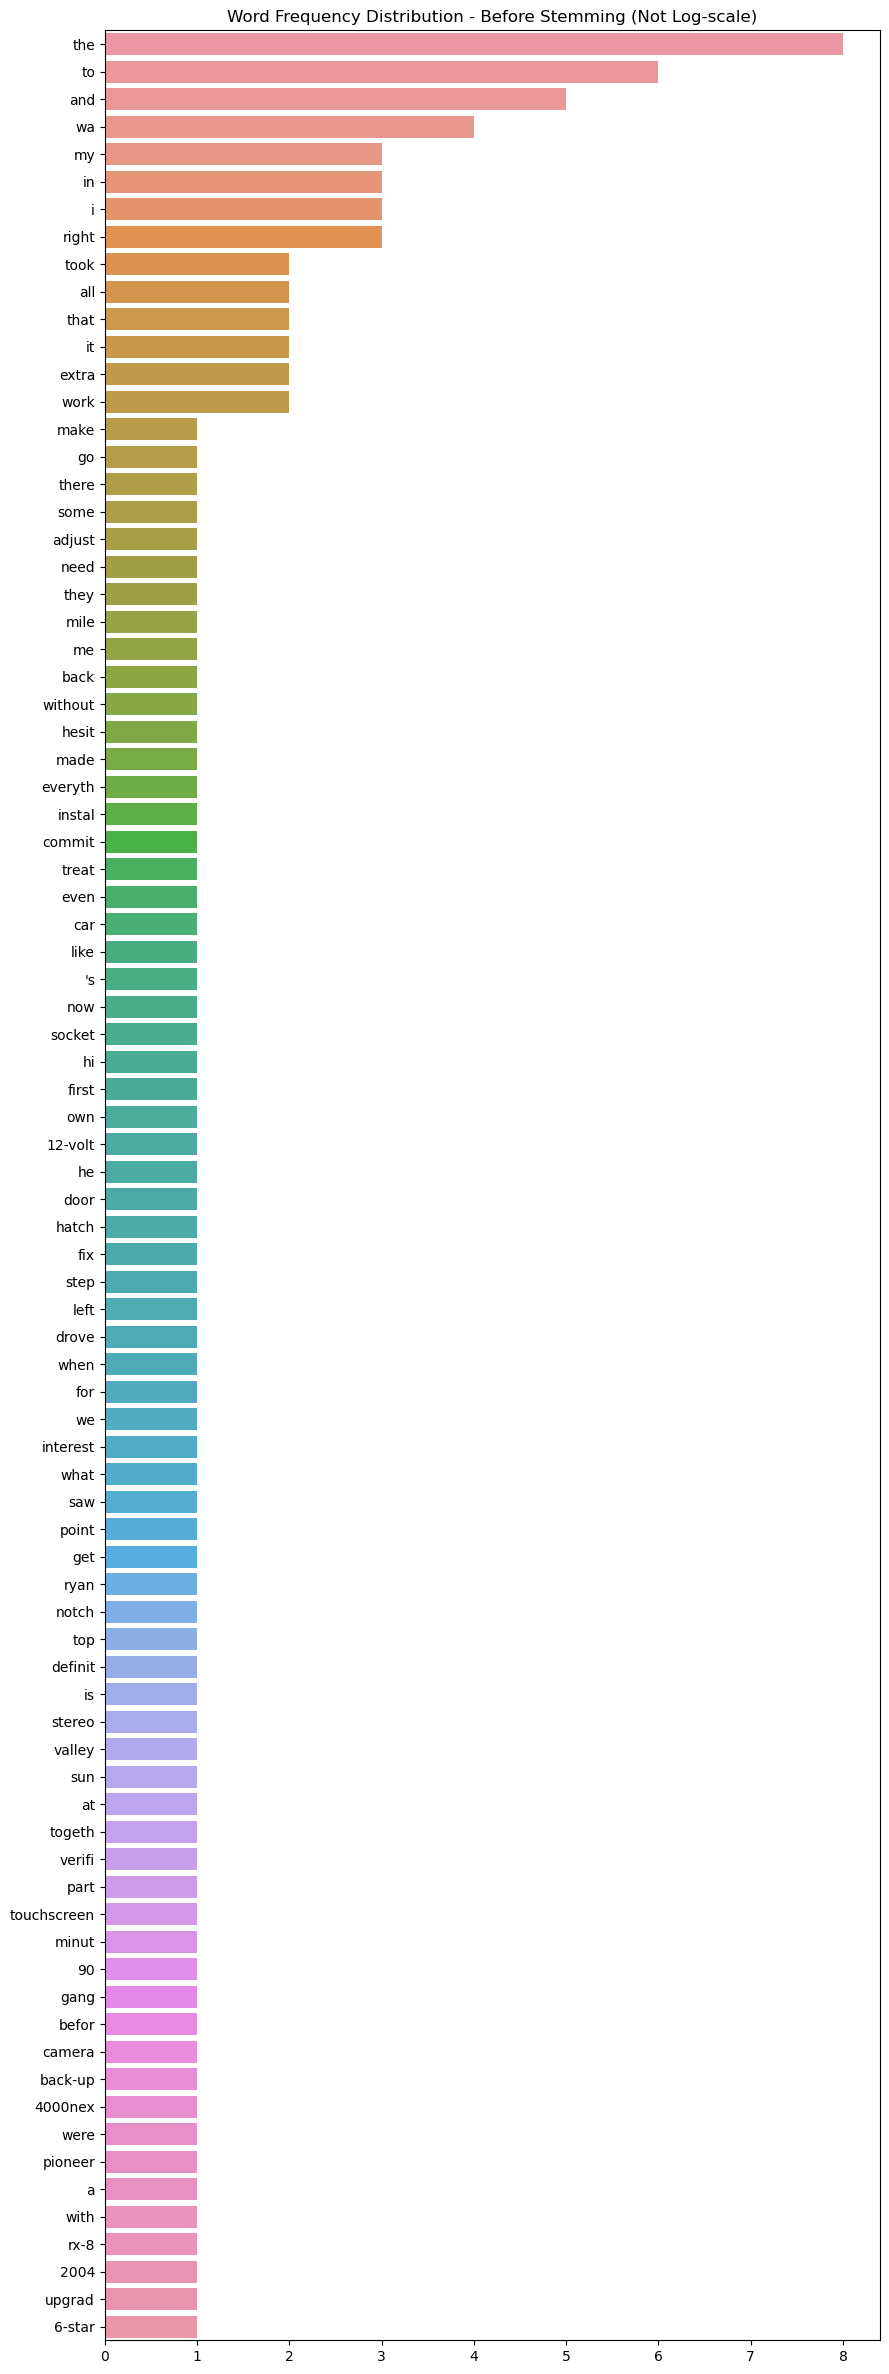

In [24]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=stemmed_freq_dist_2.values, y=stemmed_freq_dist_2.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

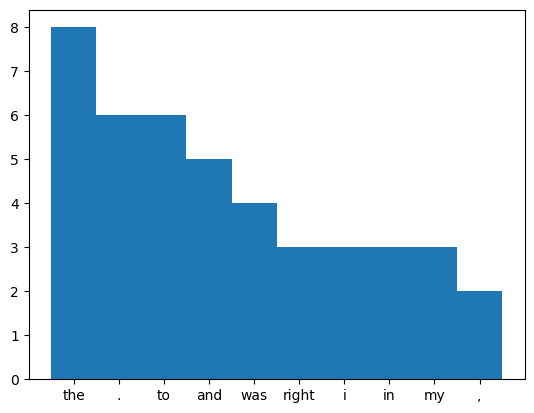

In [25]:
counts = Counter(preStem_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

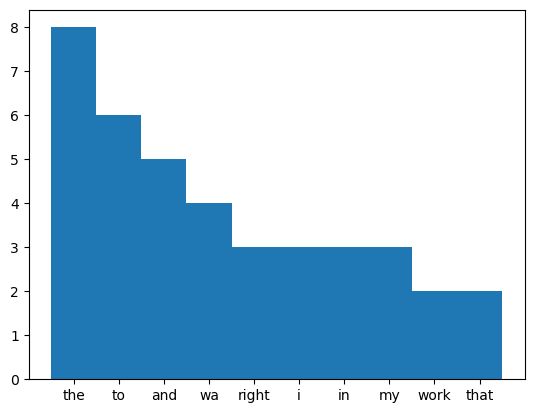

In [26]:
counts = Counter(stems_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

Remove Stopwords - Ideally we want to remove stopwords before stemming

In [27]:
sw = stopwords.words('english')

In [28]:
# Business id 1
# Remove stop words
filtered_preStem = [w for w in filtered_preStem if not w in sw]
stems = [ps.stem(w) for w in filtered_preStem]

In [29]:
freq_dist = FreqDist(filtered_preStem).most_common(10)
freq_dist = dict(freq_dist)
freq_dist = pd.Series(freq_dist)
freq_dist.sort_values(ascending=False, inplace=True)

In [30]:
stemmed_freq_dist = FreqDist(stems).most_common(10)
stemmed_freq_dist = dict(stemmed_freq_dist)
stemmed_freq_dist = pd.Series(stemmed_freq_dist)
stemmed_freq_dist.sort_values(ascending=False, inplace=True)

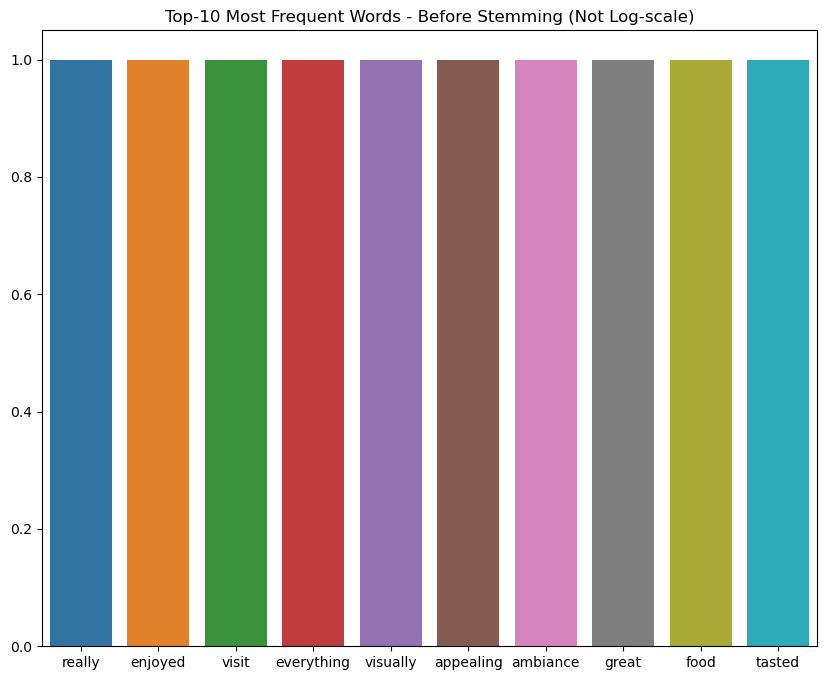

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist.index, y=freq_dist.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

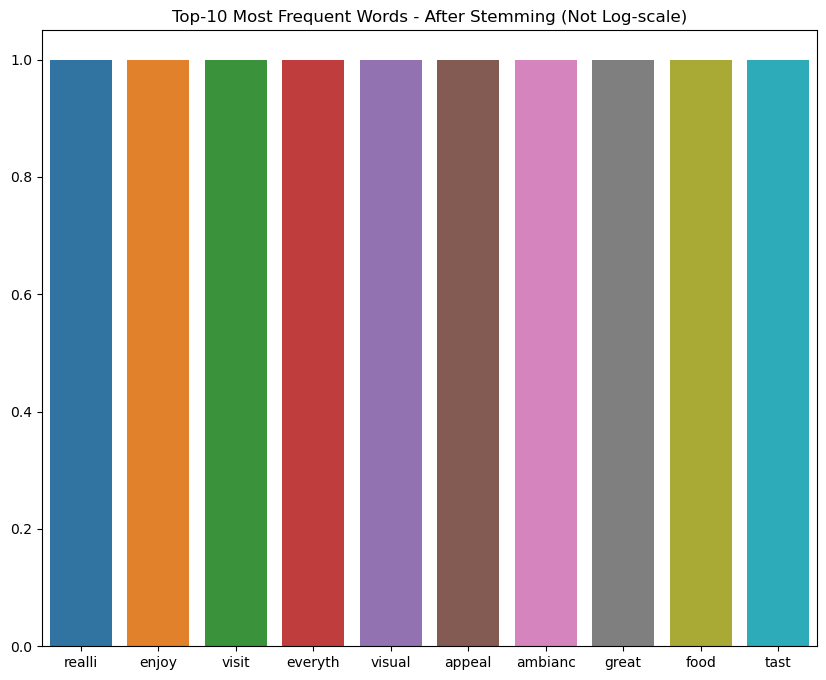

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist.index, y=stemmed_freq_dist.values, ax=ax)
plt.title("Top-10 Most Frequent Words - After Stemming (Not Log-scale)")
plt.show()

In [33]:
# Repeat for business id 2
# Remove stop words
filtered_preStem_2 = [w for w in filtered_preStem_2 if not w in sw]
stems_2 = [ps.stem(w) for w in filtered_preStem_2]

In [34]:
freq_dist_2 = FreqDist(filtered_preStem_2).most_common(10)
freq_dist_2 = dict(freq_dist_2)
freq_dist_2 = pd.Series(freq_dist_2)
freq_dist_2.sort_values(ascending=False, inplace=True)

In [35]:
stemmed_freq_dist_2 = FreqDist(stems_2).most_common(10)
stemmed_freq_dist_2 = dict(stemmed_freq_dist_2)
stemmed_freq_dist_2 = pd.Series(stemmed_freq_dist_2)
stemmed_freq_dist_2.sort_values(ascending=False, inplace=True)

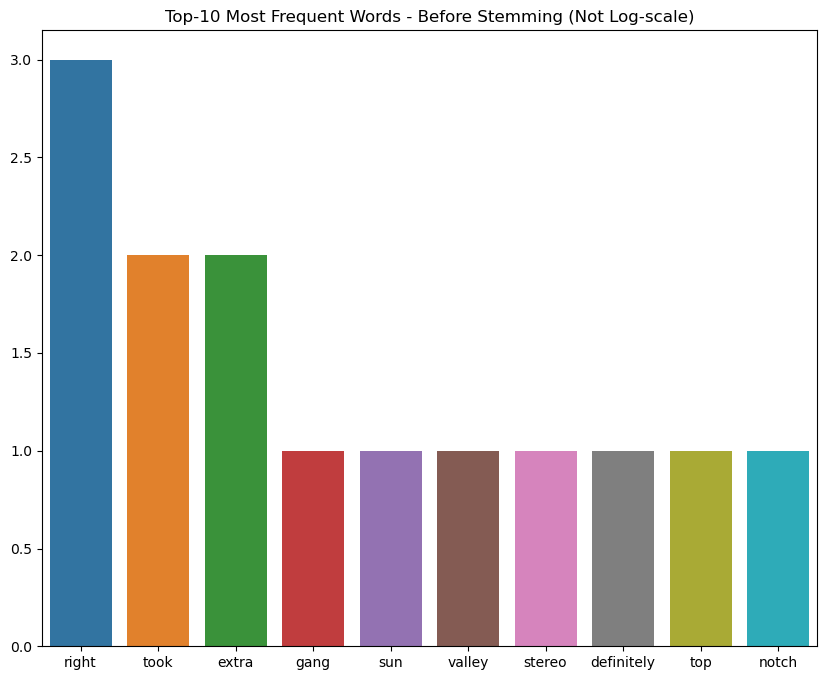

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist_2.index, y=freq_dist_2.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

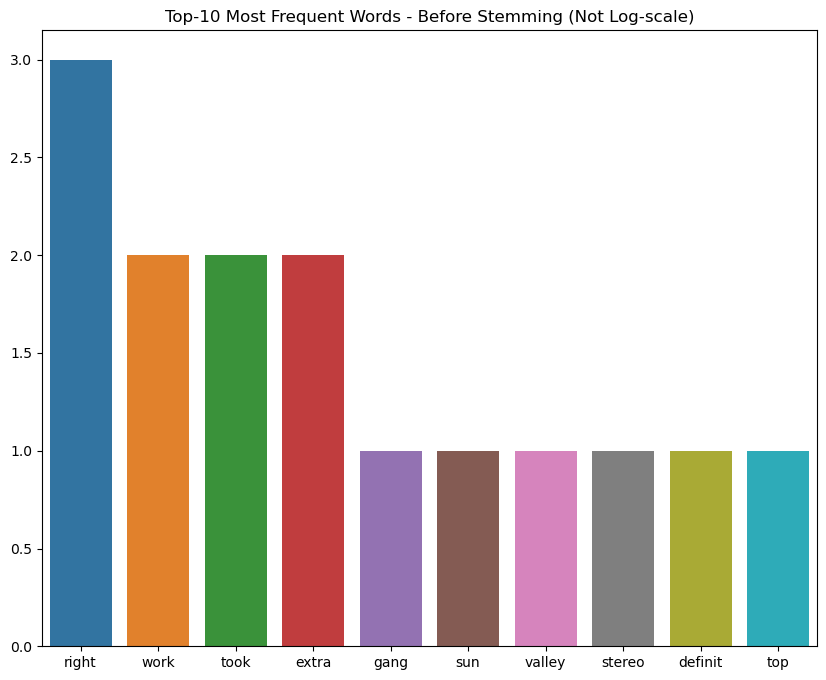

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist_2.index, y=stemmed_freq_dist_2.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

## POS Tagging

In [38]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Grace\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [39]:
sentences = []
for review in data:
    dummy_list = nltk.tokenize.sent_tokenize(review['text'])
    sentences.extend(dummy_list)
print(sentences)

["I'll be the first to admit that I was not excited about going to La Tavolta.", 'Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was nothing special and it seemed overpriced.', 'Im also not big on ordering pasta when I go out.', 'Alas, I was outnumbered.', 'Thank goodness!', 'I ordered the sea bass special.', 'It was to die for.', 'Cooked perfectly, seasoned perfectly, perfect portion.', 'I can not say enough good things about this dish.', 'When the server asked how it was he seemed very proud of the dish and said, " doesn\'t she (the chef) do an incredible job?"', 'She does.', 'My hubby got the crab tortellini and also loved his.', 'I heard "mmmm this is so good" from all around the table.', 'Our waiter was super nice and even gave us free desserts because we were some of the last people in the restaurant.', "Service was very slow and the place was PACKED but we had our jugs of wine and a large group with good conversa

In [40]:
nlp = spacy.load("en_core_web_sm")

In [41]:
patterns = [
...     (r'.*ing$', 'VBG'),                # gerunds
...     (r'.*ed$', 'VBD'),                 # simple past
...     (r'.*es$', 'VBZ'),                 # 3rd singular present
...     (r'.*ould$', 'MD'),                # modals
...     (r'.*\'s$', 'NN$'),                # possessive nouns
...     (r'.*s$', 'NNS'),                  # plural nouns
...     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
...     (r'.*', 'NN')                      # nouns (default)
... ]

In [42]:
import random
regexp_tagger = nltk.RegexpTagger(patterns)
for i in range(5):
    # Pick a random sentence
    sentence = random.choice(sentences)
    
    # Tokenise chosen sentence
    word_tokens = word_tokenize(sentence)
    
    # NLTK pos tagger
    sample_POS = nltk.pos_tag(word_tokens)
    # REGEXP tagging
    regrex_output = regexp_tagger.tag(word_tokens)
    
    # SPACY POS tagging
    spacy_tags = []
    for word in word_tokens:
        spacy_tags.append(nlp(word)[0].tag_)
    
    # Print output
    print("Sentence " + str(i+1) + ": ")
    print(f"{'Word':{15}} {'NLTK POS Tag':{15}} {'REGREX POS TAG':{15}} {'spaCy POS TAG':{15}}")
    for i in range(len(word_tokens)):
        print(f'{word_tokens[i]:{15}} {sample_POS[i][1]:{15}} {regrex_output[i][1]:{15}} {spacy_tags[i]:{15}}')
    print()

Sentence 1: 
Word            NLTK POS Tag    REGREX POS TAG  spaCy POS TAG  
Being           VBG             VBG             VBG            
a               DT              NN              DT             
food            NN              NN              NN             
snob            NN              NN              NNP            
,               ,               NN              ,              
when            WRB             NN              WRB            
a               DT              NN              DT             
group           NN              NN              NN             
of              IN              NN              IN             
friends         NNS             NNS             NNS            
suggested       VBN             VBD             VBD            
we              PRP             NN              PRP            
go              VBP             NN              VB             
for             IN              NN              IN             
dinner          NN         

## Writing Style


### Articles Chosen: 

*Channel News Asia*
> 1. https://www.channelnewsasia.com/cnainsider/school-counselling-challenge-safeguard-student-mental-health-2081496
2. https://www.channelnewsasia.com/commentary/china-ant-group-alibaba-didi-crackdown-tech-ipo-2149091

*Stackoverflow*
>1. https://stackoverflow.com/questions/69235547/flutter-app-and-woocommerce-integration-add-to-cart-function
2. https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t

*HardwareZone*
>1. https://forums.hardwarezone.com.sg/threads/beginners-bible-to-bodybuilding-supplements-fat-loss-newbies-pls-read.3419226/
2. https://forums.hardwarezone.com.sg/threads/need-advice-no-internet-for-desktop-on-singtel-fibre.6075480/

---

In [43]:
# returns (number of non capitalised proper nouns, total number of proper nouns)
def checkProperNounCapitalised(text, nlp):
    count = 0
    not_capitalised = 0
    doc = nlp(text)
    for token in doc:
        if token.pos_ == "PROPN":
            count += 1
            if not token.text[0].isupper():
                not_capitalised += 1
    return (not_capitalised, count)

In [44]:
def checkFirstWordCapitalised(text):
    punctuations = '''!()-[]{};:'"“”‘’\,<>./?@#$%^&*_~'''
    
    count = 0
    sentences = nltk.tokenize.sent_tokenize(text)
    for sentence in sentences:
        no_punct = ""
        for char in sentence:
           if char not in punctuations:
               no_punct = no_punct + char
        if no_punct[0].isupper():
            count += 1
    return (count, len(sentences))

In [45]:
# stemming
def q3_stem(text):
    overflow_prestem = []
    word = word_tokenize(text)
    overflow_prestem.extend(word)
    filtered_overflow_preStem = [w for w in overflow_prestem if not w in string.punctuation]
    return filtered_overflow_preStem

In [52]:
## Language checking function (CNA)
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
def check_language_error(data):
    totalerrors = 0
    wordcount = 0

    for i in range(len(data)):
        test_sentence = data[i].text
        wordcount += len(test_sentence)
        matches = tool.check(test_sentence)
    #     for i in range(len(matches)):
    #         print(matches[i])
        totalerrors = len(matches) + totalerrors
    print("Number of errors = ",totalerrors)
    print("Number of words = ",wordcount)
    # Percentage of language error among all words
    language_error_percentage = (totalerrors/wordcount)*100
    print("Percentage of language error = ",language_error_percentage)
    
## Language checking function (StackOverflow)
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
def check_language_error_so(data):
    totalerrors = 0
    wordcount = 0

    for i in range(len(data)):
        test_sentence = data[i]
        wordcount += len(test_sentence)
        matches = tool.check(test_sentence)
    #     for i in range(len(matches)):
    #         print(matches[i])
        totalerrors = len(matches) + totalerrors
    print("Number of errors = ",totalerrors)
    print("Number of words = ",wordcount)
    # Percentage of language error among all words
    language_error_percentage = (totalerrors/wordcount)*100
    print("Percentage of language error = ",language_error_percentage)

## Language checking function (Hardware Zone)
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
def check_language_error_hwz(data):
    totalerrors = 0
    wordcount = 0

    test_sentence = data
    wordcount += len(test_sentence)
    matches = tool.check(test_sentence)
    #     for i in range(len(matches)):
    #         print(matches[i])
    totalerrors = len(matches) + totalerrors
    print("Number of errors = ",totalerrors)
    print("Number of words = ",wordcount)
    # Percentage of language error among all words
    language_error_percentage = (totalerrors/wordcount)*100
    print("Percentage of language error = ",language_error_percentage)

In [54]:
import requests
from bs4 import BeautifulSoup

# scrape post from CNA
def scrape_text_CNA(website):
    site = requests.get(website)
    
    content = BeautifulSoup(site.content, 'html.parser')
    post = content.select('div.text-long p')
    return post

# scrape post from Stackoverflow
def scrape_text_stackoverflow(website):
    site = requests.get(website)
        
    content = BeautifulSoup(site.content, 'html.parser')
    questions = content.select('div.s-prose.js-post-body p')
    return questions

# scrape code from Stackoverflow
def scrape_code_stackoverflow(website):
    site = requests.get(website)
    content = BeautifulSoup(site.content, 'html.parser')
    code = content.select('div.s-prose.js-post-body pre code')
    return code

# scrape post from HardwareZone
def scrape_text_hardwarezone(website):
    site = requests.get(website)
    content = BeautifulSoup(site.content, 'html.parser')
    for script in content(["script", "style"]):
        script.extract()
    wrap = content.select('article.message-body.js-selectToQuote div.bbWrapper')
    return wrap[0].text

##### CNA #1

Article Name: ‘With school counsellors, it’s really hit-or-miss’: Behind the challenge of safeguarding student mental health

Website: https://www.channelnewsasia.com/cnainsider/school-counselling-challenge-safeguard-student-mental-health-2081496

In [57]:
# need to load article before running function
cna1 = scrape_text_CNA('https://www.channelnewsasia.com/cnainsider/school-counselling-challenge-safeguard-student-mental-health-2081496')
for i in range(len(cna1)):
    print(cna1[i].text)
    print('\n')

* denotes name changed to protect the person’s identity


SINGAPORE: When Jane* opened up to her secondary school counsellor about the cold wars and troubles she was having with some close friends, she was told that “life’s like that”.


That was the then 14-year-old’s first session.


“I felt ignored, like (school counselling is hopeless) even if I bring up my problems,” said Jane, now 17 and in her first year at junior college.


She had been “mandated” to attend counselling because she was frequently late for class and did not submit homework on time. She recalled her form teacher telling her outside the classroom, in full view and within earshot of her classmates, that a session had been arranged to address her tardiness.


“It brings the idea that those who aren’t faring well have some problems and need to see the counsellor, rather than (the idea that) people … want to see a counsellor because of personal reasons,” she said.


After three compulsory sessions on her time managemen

In [58]:
check_language_error(cna1)

Number of errors =  164
Number of words =  31856
Percentage of language error =  0.5148166750376695


In [59]:
caps_cna_1 = []
total_count_cna1 = 0
total_numSentences_cna1 = 0

for i in range(len(cna1)):
    caps_cna_1 += [cna1[i].text]

for i in range(len(caps_cna_1)):
    (count, numSentences) = checkFirstWordCapitalised(caps_cna_1[i])
    total_count_cna1 += count
    total_numSentences_cna1 += numSentences

print("Total count of capitalised first words: ", total_count_cna1)
print("Total number of sentences: ", total_numSentences_cna1)
print("Percentage: ", (total_count_cna1/total_numSentences_cna1) * 100)

# analysis: first sentence - caption


Total count of capitalised first words:  264
Total number of sentences:  268
Percentage:  98.50746268656717


In [60]:
pronoun_cna1 = []
pronoun_count_cna1 = 0
total_pronoun_cna1 = 0

for i in range(len(cna1)):
    pronoun_cna1 += [cna1[i].text]

for i in range(len(pronoun_cna1)):
    (count, numSentences) = checkProperNounCapitalised(pronoun_cna1[i], nlp)
    pronoun_count_cna1 += count
    total_pronoun_cna1 += numSentences

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_cna1)
print("Total number of pronouns: ", total_pronoun_cna1)
print("Percentage: ", (pronoun_count_cna1/total_pronoun_cna1) * 100)

Total count of non-capitalised capitalised pronouns:  3
Total number of pronouns:  216
Percentage:  1.3888888888888888


##### CNA #2

Article Name: Commentary: China's smackdown on corporate giants may be a start of national rebuilding

Website: https://www.channelnewsasia.com/commentary/china-ant-group-alibaba-didi-crackdown-tech-ipo-2149091

In [61]:
# need to load article before running function
cna2 = scrape_text_CNA('https://www.channelnewsasia.com/commentary/china-ant-group-alibaba-didi-crackdown-tech-ipo-2149091')
for i in range(len(cna2)):
    print(cna2[i].text)
    print('\n')

BANGKOK: In recent years, China’s digital economy has seemed like a house undergoing full-scale renovation. At this moment, it appears to be in the demolition stage.


In a series of regulatory smackdowns, the magnitude ranging from sledgehammers to wrecking balls, Beijing has appeared willing to lay waste to entire industries and billion-dollar firms in the interest of rebuilding much of the country’s technology and Internet sectors to align with its objectives.


Thus far, casualties have included Ant Group, whose planned initial public offering (IPO) in November 2020 was set to be the largest in history until authorities slammed the brakes and imposed rules forcing the fintech giant to restructure much of its business. 


After the ride-hailing company Didi Global reportedly ignored warnings not to go through with its June public offering in the United States, Beijing responded swiftly with a thorough probe of the firm’s data security practices, ordering the removal of Didi apps and

In [62]:
check_language_error(cna2)

Number of errors =  24
Number of words =  6902
Percentage of language error =  0.34772529701535787


In [63]:
caps_cna_2 = []
total_count_cna2 = 0
total_numSentences_cna2 = 0

for i in range(len(cna2)):
    caps_cna_2 += [cna2[i].text]

for i in range(len(caps_cna_2)):
    (count_cna2, numSentences_cna2) = checkFirstWordCapitalised(caps_cna_2[i])
    total_count_cna2 += count_cna2
    total_numSentences_cna2 += numSentences_cna2

print("Total count of capitalised first words: ", total_count_cna2)
print("Total number of sentences: ", total_numSentences_cna2)
print("Percentage: ", (total_count_cna2/total_numSentences_cna2) * 100)

Total count of capitalised first words:  38
Total number of sentences:  38
Percentage:  100.0


In [64]:
pronoun_cna2 = []
pronoun_count_cna2 = 0
total_pronoun_cna2 = 0

for i in range(len(cna2)):
    pronoun_cna2 += [cna2[i].text]

for i in range(len(pronoun_cna2)):
    (count_cna2, numSentences_cna2) = checkProperNounCapitalised(pronoun_cna2[i], nlp)
    pronoun_count_cna2 += count_cna2
    total_pronoun_cna2 += numSentences_cna2

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_cna2)
print("Total number of pronouns: ", total_pronoun_cna2)
print("Percentage: ", (pronoun_count_cna2/total_pronoun_cna2) * 100)

Total count of non-capitalised capitalised pronouns:  1
Total number of pronouns:  82
Percentage:  1.2195121951219512


##### StackOverflow #1

Post Name: how to automatically generate a unique c++ class based on a file

Website: https://stackoverflow.com/questions/69684527/how-to-automatically-generate-a-unique-c-class-based-on-a-file 

In [90]:
# Scraping of Post Text
soText_1 = scrape_text_stackoverflow('https://stackoverflow.com/questions/69684527/how-to-automatically-generate-a-unique-c-class-based-on-a-file')
for i in range(len(soText_1)):
    print(soText_1[i].text)
    print('\n')

let me preface this question by saying I have no idea if I'm asking the right question. I'm pretty new to c++ and I haven't gotten all of its nuances down yet, but I have coded in other OOP languages for nearly 7 years.


I originally asked:
Is there a way to take a text file and automatically generate c++ code? If yes, how do I do that? What are some resources that explain the process?


but to clarify, what I really want is:
Is there some way to take a text file, or other file type (like json) and use it to generate a compiled c++ class, or other compiled object, that can be interfaced with c++?


The final result doesn't need to be human readable, and it can be system specific.


I'm making a game engine, and I am trying to design a system that allows me to plug and play with systems, without having to write a lot of boiler plate code.


Someone commented that I should make the example simpler. So here goes.


I'm trying to build a system that takes a text file input and builds me a

In [91]:
check_language_error(soText_1)

Number of errors =  14
Number of words =  2518
Percentage of language error =  0.5559968228752978


In [92]:
caps_so_1 = []
total_count_so1 = 0
total_numSentences_so1 = 0

for i in range(len(soText_1)):
    caps_so_1 += [soText_1[i].text]

for i in range(len(caps_so_1)):
    (count_so1, numSentences_so1) = checkFirstWordCapitalised(caps_so_1[i])
    total_count_so1 += count_so1
    total_numSentences_so1 += numSentences_so1

print("Total count of capitalised first words: ", total_count_so1)
print("Total number of sentences: ", total_numSentences_so1)
print("Percentage: ", (total_count_so1/total_numSentences_so1) * 100)

Total count of capitalised first words:  19
Total number of sentences:  24
Percentage:  79.16666666666666


In [93]:
pronoun_so1 = []
pronoun_count_so1 = 0
total_pronoun_so1 = 0

for i in range(len(soText_1)):
    pronoun_so1 += [soText_1[i].text]

for i in range(len(pronoun_so1)):
    (count_so1, numSentences_so1) = checkProperNounCapitalised(pronoun_so1[i], nlp)
    pronoun_count_so1 += count_so1
    total_pronoun_so1 += numSentences_so1

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_so1)
print("Total number of pronouns: ", total_pronoun_so1)
print("Percentage: ", (pronoun_count_so1/total_pronoun_so1) * 100)

Total count of non-capitalised capitalised pronouns:  3
Total number of pronouns:  4
Percentage:  75.0


In [96]:
# Scraping of Whole Code
soCodeWhole_1 = scrape_code_stackoverflow('https://stackoverflow.com/questions/69684527/how-to-automatically-generate-a-unique-c-class-based-on-a-file')
for i in range(len(soCodeWhole_1)):
    print(soCodeWhole_1[i].text)
    print('\n')

objectGenerator ExampleClass {
autofunction[hello world]
}



class ExampleClass
{
public:
    void callAutoFunctions()
    {
        helloWorld();
    }

private:
    AutoFunction helloWorld;
};



void main()
{
    GeneratedClasses::ExampleClass exampleClass; 
    exampleClass.callAutoFunctions();
}





In [98]:
# Getting stem
for i in range(len(soCodeWhole_1)):
    codeStem_1 = q3_stem(soCodeWhole_1[i].text)
    print(codeStem_1)

['objectGenerator', 'ExampleClass', 'autofunction', 'hello', 'world']
['class', 'ExampleClass', 'public', 'void', 'callAutoFunctions', 'helloWorld', 'private', 'AutoFunction', 'helloWorld']
['void', 'main', 'GeneratedClasses', ':ExampleClass', 'exampleClass', 'exampleClass.callAutoFunctions']


In [97]:
check_language_error(soCodeWhole_1)

Number of errors =  22
Number of words =  297
Percentage of language error =  7.4074074074074066


In [103]:
# Scraping of Post Code Comments
import re
soCode_1 = scrape_code_stackoverflow('https://stackoverflow.com/questions/69684527/how-to-automatically-generate-a-unique-c-class-based-on-a-file')
comments_1 = []
for i in range(len(soCode_1)):
    pattern = re.compile('(?:/\*(.*?)\*/)|(?://(.*?)\n)',re.S)
    comment = pattern.findall(soCode_1[i].text)
    for x in range(len(comment)):
        for y in range(len(comment[0])):
            star_cleaned = re.sub(r'[*]', '', comment[x][y])
            space_cleaned = re.sub(r'[\n ]+', ' ', star_cleaned)
            if space_cleaned != "":
                comments_1.append(space_cleaned)
for c in range(len(comments_1)):
    print(comments_1[c])
    print("\n")

# language error is not done due to the lack of comments in this post
#check_language_error_so(comments_1)

##### StackOverflow #2

Post Name: Debugging error org.apache.axis2.AxisFault: Connection or outbound has closed, the trustAnchors parameter must be non-empty

Website: https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t

In [70]:
# Scraping Post Text
soText_2 = scrape_text_stackoverflow('https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t')
for i in range(len(soText_2)):
    print(soText_2[i].text)
    print('\n')

We are facing trouble trying to connect to a web service using Netbeans with Java OpenJDK 14 and Apache Tomcat 9. It's a specific environment which requires Axis2 1.6.2 library to connect to WSDL via SSL certificate trusted with keytool. We changed Axis2 to 1.7.9 without success.


We get the following error:


We tried to test a java main class with the following code:


However, the line which throws error is the last one:


Firewall rules are open and the web service allows connection to a list of IP Addresses. Our IP is allowed to connect so any ideas on how can we debug this error please? We think the connection to the web service is being rejected but we are not sure.


EDIT: After following suggestion from comment, it turned out it may be a problem with SSL certificate, since using jvm parameter


revealed the following error:


We are using keytool with OpenJDK 14 as follows:


The keystore is generated automatically with the line above. An organization for finding people info 

In [71]:
check_language_error(soText_2)

Number of errors =  16
Number of words =  1864
Percentage of language error =  0.8583690987124464


In [72]:
caps_so_2 = []
total_count_so2 = 0
total_numSentences_so2 = 0

for i in range(len(soText_2)):
    caps_so_2 += [soText_2[i].text]

for i in range(len(caps_so_2)):
    (count_so2, numSentences_so2) = checkFirstWordCapitalised(caps_so_2[i])
    total_count_so2 += count_so2
    total_numSentences_so2 += numSentences_so2

print("Total count of capitalised first words: ", total_count_so2)
print("Total number of sentences: ", total_numSentences_so2)
print("Percentage: ", (total_count_so2/total_numSentences_so2) * 100)

Total count of capitalised first words:  25
Total number of sentences:  26
Percentage:  96.15384615384616


In [73]:
pronoun_so2 = []
pronoun_count_so2 = 0
total_pronoun_so2 = 0

for i in range(len(soText_2)):
    pronoun_so2 += [soText_2[i].text]

for i in range(len(pronoun_so2)):
    (count_so2, numSentences_so2) = checkProperNounCapitalised(pronoun_so2[i], nlp)
    pronoun_count_so2 += count_so2
    total_pronoun_so2 += numSentences_so2

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_so2)
print("Total number of pronouns: ", total_pronoun_so2)
print("Percentage: ", (pronoun_count_so2/total_pronoun_so2) * 100)

Total count of non-capitalised capitalised pronouns:  4
Total number of pronouns:  16
Percentage:  25.0


In [74]:
# Scraping of Whole Code
soCodeWhole_2 = scrape_code_stackoverflow('https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t')
for i in range(len(soCodeWhole_2)):
    print(soCodeWhole_2[i].text)
    print('\n')

org.apache.axis2.AxisFault: Connection or outbound has closed
org.apache.axis2.AxisFault.makeFault(AxisFault.java:430)
org.apache.axis2.transport.http.SOAPMessageFormatter.writeTo(SOAPMessageFormatter.java:78)
org.apache.axis2.transport.http.AxisRequestEntity.writeRequest(AxisRequestEntity.java:84)

com.ctc.wstx.exc.WstxIOException: Connection or outbound has closed
    com.ctc.wstx.sw.BaseStreamWriter.finishDocument(BaseStreamWriter.java:1687)
    com.ctc.wstx.sw.BaseStreamWriter.close(BaseStreamWriter.java:288)
    org.apache.axiom.om.impl.MTOMXMLStreamWriter.close(MTOMXMLStreamWriter.java:222)
    org.apache.axiom.om.impl.llom.OMSerializableImpl.serializeAndConsume(OMSerializableImpl.java:192)
    org.apache.axis2.transport.http.SOAPMessageFormatter.writeTo(SOAPMessageFormatter.java:74)
    org.apache.axis2.transport.http.AxisRequestEntity.writeRequest(AxisRequestEntity.java:84)

java.net.SocketException: Connection or outbound has closed
    java.base/sun.security.ssl.SSLSocketImpl

In [75]:
# Getting stem
codeStem_2_final = []
for i in range(len(soCodeWhole_2)):
    codeStem_2 = q3_stem(soCodeWhole_2[i].text)
    codeStem_2_final += codeStem_2
    
codeStem_2_final

['org.apache.axis2.AxisFault',
 'Connection',
 'or',
 'outbound',
 'has',
 'closed',
 'org.apache.axis2.AxisFault.makeFault',
 'AxisFault.java:430',
 'org.apache.axis2.transport.http.SOAPMessageFormatter.writeTo',
 'SOAPMessageFormatter.java:78',
 'org.apache.axis2.transport.http.AxisRequestEntity.writeRequest',
 'AxisRequestEntity.java:84',
 'com.ctc.wstx.exc.WstxIOException',
 'Connection',
 'or',
 'outbound',
 'has',
 'closed',
 'com.ctc.wstx.sw.BaseStreamWriter.finishDocument',
 'BaseStreamWriter.java:1687',
 'com.ctc.wstx.sw.BaseStreamWriter.close',
 'BaseStreamWriter.java:288',
 'org.apache.axiom.om.impl.MTOMXMLStreamWriter.close',
 'MTOMXMLStreamWriter.java:222',
 'org.apache.axiom.om.impl.llom.OMSerializableImpl.serializeAndConsume',
 'OMSerializableImpl.java:192',
 'org.apache.axis2.transport.http.SOAPMessageFormatter.writeTo',
 'SOAPMessageFormatter.java:74',
 'org.apache.axis2.transport.http.AxisRequestEntity.writeRequest',
 'AxisRequestEntity.java:84',
 'java.net.SocketExce

In [76]:
check_language_error(soCodeWhole_2)

Number of errors =  172
Number of words =  2796
Percentage of language error =  6.151645207439199


In [77]:
# Scraping of Post Code Comments
soCode_2 = scrape_code_stackoverflow('https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t')
comments_2 = []
for i in range(len(soCode_2)):
    pattern = re.compile('(?:/\*(.*?)\*/)|(?://(.*?)\n)',re.S)
    comment = pattern.findall(soCode_2[i].text)
    for x in range(len(comment)):
        for y in range(len(comment[0])):
            star_cleaned = re.sub(r'[*]', '', comment[x][y])
            space_cleaned = re.sub(r'[\n ]+', ' ', star_cleaned)
            if space_cleaned != "":
                comments_2.append(space_cleaned)
for c in range(len(comments_2)):
    print(comments_2[c])
    print("\n")

 Generate curp


services.wserv.ecurp.dgti.segob.gob.mx", "consultarCurpDetalle");




In [78]:
check_language_error_so(comments_2)

Number of errors =  12
Number of words =  79
Percentage of language error =  15.18987341772152


##### HardwareZone #1

Post Name: Beginner's Bible To Bodybuilding/Supplements/Fat-Loss ( Newbies Pls Read!!!)

Website: https://forums.hardwarezone.com.sg/threads/beginners-bible-to-bodybuilding-supplements-fat-loss-newbies-pls-read.3419226/

In [79]:
# Scraping data from HardwareZone
hwz_1 = scrape_text_hardwarezone('https://forums.hardwarezone.com.sg/threads/beginners-bible-to-bodybuilding-supplements-fat-loss-newbies-pls-read.3419226/')
print(hwz_1)

This is a monster thread of our old stickies you can find here:
A Beginner's Guide To Bodybuilding ( Newbies Pls Read!!!)
Beginner's Guide To Supplements( Newbies Pls Read!!!)
Beginners' Guide to Fat Loss / Q&A / FAQ

To jump to Beginnger's Bible to Supplements in this thread, click here.
To jump to Beginner's Bible to Fat-Loss, click here.

Credit goes to galapogos and rockstarz.




Beginner's Bible To Bodybuilding
Basic Nutrition

It's quite well known that nutrition is one of, if not the, most important factors of bodybuilding. I'd like to give a basic breakdown of some of the more basic aspects that everyone should be aware of.

As for a very basic breakdowns, all food consist of: carbs, proteins, and fats. Again...this is on a very basic level (as it all gets much more complex).

Protien (4 calories/gram) - Protien is the building block of muscle, so it's no wonder why bodybuilders are recomended to take in 1-1.5g/lb of bodyweight....minimum. There has been a debate that has stil

In [80]:
check_language_error_hwz(hwz_1)

Number of errors =  75
Number of words =  7260
Percentage of language error =  1.0330578512396695


In [81]:
total_count_hwz1 = 0
total_numSentences_hwz1 = 0

(count_hwz1, numSentences_hwz1) = checkFirstWordCapitalised(hwz_1)
total_count_hwz1 += count_hwz1
total_numSentences_hwz1 += numSentences_hwz1

print("Total count of capitalised first words: ", total_count_hwz1)
print("Total number of sentences: ", total_numSentences_hwz1)
print("Percentage: ", (total_count_hwz1/total_numSentences_hwz1) * 100)

Total count of capitalised first words:  50
Total number of sentences:  55
Percentage:  90.9090909090909


In [82]:
pronoun_count_hwz1 = 0
total_pronoun_hwz1 = 0

(count_hwz1, numSentences_hwz1) = checkProperNounCapitalised(hwz_1, nlp)    
pronoun_count_hwz1 += count_hwz1
total_pronoun_hwz1 += numSentences_hwz1

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_hwz1)
print("Total number of pronouns: ", total_pronoun_hwz1)
print("Percentage: ", (pronoun_count_hwz1/total_pronoun_hwz1) * 100)

Total count of non-capitalised capitalised pronouns:  8
Total number of pronouns:  54
Percentage:  14.814814814814813


##### HardwareZone #2

Post Name: Need advice. No internet for desktop on Singtel fibre

Website: https://forums.hardwarezone.com.sg/threads/need-advice-no-internet-for-desktop-on-singtel-fibre.6075480/

In [83]:
hwz_2 = scrape_text_hardwarezone('https://forums.hardwarezone.com.sg/threads/need-advice-no-internet-for-desktop-on-singtel-fibre.6075480/')
print(hwz_2)

Hi all,

recently recontracted my st 1gbps plan and suddenly no internet connection on my desktop (connected via lan cable). wireless is fine. ps4 lan connection is fine too. using asus ac2400 router for past 4 years with no issues. reset router several times also no use. even reinstalled win10 also cannot.

any advice is appreciated.


In [84]:
check_language_error_hwz(hwz_2)

Number of errors =  10
Number of words =  336
Percentage of language error =  2.976190476190476


In [85]:
total_count_hwz2 = 0
total_numSentences_hwz2 = 0

(count_hwz2, numSentences_hwz2) = checkFirstWordCapitalised(hwz_2)
total_count_hwz2 += count_hwz2
total_numSentences_hwz2 += numSentences_hwz2

print("Total count of capitalised first words: ", total_count_hwz2)
print("Total number of sentences: ", total_numSentences_hwz2)
print("Percentage: ", (total_count_hwz2/total_numSentences_hwz2) * 100)

Total count of capitalised first words:  1
Total number of sentences:  7
Percentage:  14.285714285714285


In [86]:
pronoun_count_hwz2 = 0
total_pronoun_hwz2 = 0

(count_hwz1, numSentences_hwz1) = checkProperNounCapitalised(hwz_2, nlp)    
pronoun_count_hwz2 += count_hwz2
total_pronoun_hwz2 += numSentences_hwz2

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_hwz2)
print("Total number of pronouns: ", total_pronoun_hwz2)
print("Percentage: ", (pronoun_count_hwz2/total_pronoun_hwz2) * 100)

Total count of non-capitalised capitalised pronouns:  1
Total number of pronouns:  7
Percentage:  14.285714285714285


## Most frequent ⟨ Noun - Adjective ⟩ pairs for each rating

In [104]:
with open('reviewSelected100.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [105]:
unique_businesses = set()
for review in data:
    unique_businesses.add(review['business_id'])
print("Number of businesses: " + str(len(unique_businesses)))

Number of businesses: 153


Create Search Engine using ElasticSearch for Indexing

In [106]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers

In [107]:
es = Elasticsearch(HOST="http://localhost", PORT=9200)

In [108]:
# Define body of index
body={
    'settings': {
        'number_of_shards': 1,
        'number_of_replicas': 0,
        'index': {
          'sort.field': 'date',
          'sort.order': 'asc'
        },

        # custom analyzer
        'analysis': {
            'analyzer': {
                'review_analyzer': {
                    'type': 'custom',
                      'tokenizer': 'standard',
                      'filter': ['lowercase', 'english_stop', 'porter_stem']
                    }
                  },
            'filter': {
                'english_stop': { 
                'type': 'stop',
                'stopwords': '_english_'
                }
            }
        }
    },
    'mappings': {
        'properties': {
            'text': {
                'type': 'text',
                'analyzer': 'review_analyzer',
                'search_analyzer': 'review_analyzer'
            },
            'date': {
                'type': 'date',
                'format': 'yyyy-MM-dd HH:mm:ss'
            }
        }
    }
}

In [109]:
def review_generator(data):
    for review in data:
        yield {
                "_index": index_name,
                "_type": "_doc",
                "_id" : f"{review['review_id']}",
                "_source": review,
            }

In [110]:
index_name = "review-index"
if not es.indices.exists(index=index_name):
    es.indices.create(index=index_name, body=body)
    helpers.bulk(es, review_generator(data))
    print("Index created")
else:
    print("Index already exists")

GET http://localhost:9200/ [status:N/A request:4.082s]
Traceback (most recent call last):
  File "C:\Users\Grace\Anaconda3\envs\tensorflow_env\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\Grace\Anaconda3\envs\tensorflow_env\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\Grace\Anaconda3\envs\tensorflow_env\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Grace\Anaconda3\envs\tensorflow_env\lib\site-packages\elasticsearch\connection\http_urllib3.py", line 251, in perform_request
    response = self.pool.urlopen(
  File "C:\Users\Grace\Anaconda3\envs\tensorflow_env\lib\s

ConnectionError: ConnectionError(<urllib3.connection.HTTPConnection object at 0x0000020371714310>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it) caused by: NewConnectionError(<urllib3.connection.HTTPConnection object at 0x0000020371714310>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it)

In [ ]:
def retrieveUniqueReviewsByRating(num_of_reviews, rating, es, index_name):
    doc_count = 0
    reviews = []
    query = {
        "size": 100,
        "query": {
            "match": {
                "stars": rating
            }
        }
    }
    # Make a search request
    res = es.search(index=index_name, body=query, scroll='2s')
    
    for doc in res['hits']['hits']:
        print("\n", doc['_id'], doc['_source']['text'], doc['_source']['date'], doc['_score'])
        doc_count += 1
        print("DOC COUNT:", doc_count)
        reviews.append(doc['_source'])
    
    old_scroll_id = res['_scroll_id']
    
    while len(res['hits']['hits']):
        res = es.scroll(scroll_id=old_scroll_id, scroll='2s')
        if old_scroll_id != res['_scroll_id']:
            print("New scroll id: " + res['_scroll_id'])
        old_scroll_id = res['_scroll_id']
        
        print("\nResponse for index:", index_name)
        print("Scroll ID:", res['_scroll_id'])
        print("Total Hits:", res['hits']['total']['value'])
        
        # Iterate over hits for each scroll
        for doc in res['hits']['hits']:
            print("\n", doc['_id'], doc['_source']['text'], doc['_source']['date'], doc['_score'])
            doc_count += 1
            print("DOC COUNT:", doc_count)
            reviews.append(doc['_source'])
        
    print("\nTOTAL DOC COUNT:", doc_count)
    
    # From the reviews retrieved, extract X reviews, one from each unique business
    unique_reviews = []
    business_set = set()
    while len(unique_reviews) < num_of_reviews:
        # Find a random review
        random_number = randrange(doc_count)
        # Don't take review if same business already taken
        if reviews[random_number]['business_id'] in business_set:
            continue
        else:
            business_set.add(reviews[random_number]['business_id'])
            unique_reviews.append(reviews[random_number])
    return unique_reviews

Randomly select 50 reviews (one from each business) of rating 1, extract the top-10 most frequent noun-adjective pairs from the sentences in these selected reviews.

In [ ]:
# Get the reviews
reviews_rating_1 = retrieveUniqueReviewsByRating(50, 1, es, index_name)

In [ ]:
reviews_rating_1

In [ ]:
def find_nouns_in_conjunction(token, noun):
    queue = [noun]
    result = []
    while len(queue) > 0:
        noun = queue.pop(0)
        for c in noun.children:
            if c.pos_ == "NOUN" and c.dep_ == 'conj':
                result.append((c.text.lower(), token.text.lower()))
                queue.append(c)
    return result

In [ ]:
def find_noun_adj_pairs(review_text, nlp):
    noun_adj_pairs = []
    sentences = nltk.tokenize.sent_tokenize(review_text)
    for sentence in sentences:
        doc = nlp(sentence)
        for token in doc:
            if token.pos_ == "ADJ":
                if token.dep_ == "amod":
                    noun = token.head
                    # Add the main head noun
                    if (noun.pos_ == "NOUN"):
                        noun_adj_pairs.append((noun.text.lower(), token.text.lower()))
                    # Search for other nouns in conjunction
                    noun_adj_pairs.extend(find_nouns_in_conjunction(token, noun))
                elif token.dep_ == "acomp" or token.dep_ == "oprd":
                    head = token.head
                    for c in head.children:
                        if c.pos_ == "NOUN" and c.dep_ == 'nsubj':
                            noun_adj_pairs.append((c.text.lower(), token.text.lower()))
                            head = c
                    # Search for other nouns in conjunction
                    noun_adj_pairs.extend(find_nouns_in_conjunction(token, head))
                elif token.dep_ == "conj":
                    temp = token.head
                    found_noun = True
                    while temp.dep_ != 'amod' and temp.dep_ != 'acomp' and temp.dep_ != 'oprd':
                        if temp.dep_ == 'conj' and temp.pos_ == 'ADJ':
                            temp = temp.head
                        else:
                            found_noun = False
                            break
                    if found_noun:
                        if temp.dep_ == 'amod':
                            noun = temp.head
                            # Add the main head noun
                            if (noun.pos_ == "NOUN"):
                                noun_adj_pairs.append((noun.text.lower(), token.text.lower()))
                            # Search for other nouns in conjunction
                            noun_adj_pairs.extend(find_nouns_in_conjunction(token, noun))
                        elif temp.dep_ == 'acomp' or temp.dep_ == 'oprd':
                            head = temp.head
                            for c in head.children:
                                if c.pos_ == "NOUN" and c.dep_ == 'nsubj':
                                    noun_adj_pairs.append((c.text.lower(), token.text.lower()))
                                    head = c
                            # Search for other nouns in conjunction
                            noun_adj_pairs.extend(find_nouns_in_conjunction(token, head))
    return noun_adj_pairs

In [ ]:
from spacy import displacy
sample_review = reviews_rating_1[1]['text']
sample_sentence = nltk.tokenize.sent_tokenize(sample_review)[0]
displacy.render(nlp(sample_sentence), style='dep', jupyter=True)

In [ ]:
print ("{:<12} | {:<6} | {:<8} | {:<13} | {:<20}".format('Token', 'POS', 'Relation','Head', 'Children'))
print ("-" * 75)

for token in nlp(sample_sentence):
  # Print the token, dependency nature, head and all dependents of the token
  print ("{:<12} | {:<6} | {:<8} | {:<13} | {:<20}"
         .format(str(token.text), str(token.pos_), str(token.dep_), str(token.head.text), str([child for child in token.children])))

In [ ]:
noun_adj_pairs_rating_1 = []

for review in reviews_rating_1:
    noun_adj_pairs_rating_1.extend(find_noun_adj_pairs(review['text'], nlp))

In [ ]:
noun_adj_pairs_rating_1

In [ ]:
freq_dist_rating_1 = FreqDist(noun_adj_pairs_rating_1).most_common(10)
freq_dist_rating_1 = list(freq_dist_rating_1)
freq_dist_rating_1 = pd.DataFrame(freq_dist_rating_1, columns = ["Noun-Adjective", "Count"])

In [ ]:
freq_dist_rating_1

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_1["Noun-Adjective"], x=freq_dist_rating_1['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 1)")
plt.show()

Do the same for 20 reviews of ratings 2, 3, 4 and 5, respectively.

In [ ]:
# Get the reviews
reviews_rating_2 = retrieveUniqueReviewsByRating(20, 2, es, index_name)
reviews_rating_3 = retrieveUniqueReviewsByRating(20, 3, es, index_name)
reviews_rating_4 = retrieveUniqueReviewsByRating(20, 4, es, index_name)
reviews_rating_5 = retrieveUniqueReviewsByRating(20, 5, es, index_name)

In [ ]:
noun_adj_pairs_rating_2 = []
noun_adj_pairs_rating_3 = []
noun_adj_pairs_rating_4 = []
noun_adj_pairs_rating_5 = []

for review in reviews_rating_2:
    noun_adj_pairs_rating_2.extend(find_noun_adj_pairs(review['text'], nlp))
    
for review in reviews_rating_3:
    noun_adj_pairs_rating_3.extend(find_noun_adj_pairs(review['text'], nlp))
    
for review in reviews_rating_4:
    noun_adj_pairs_rating_4.extend(find_noun_adj_pairs(review['text'], nlp))
    
for review in reviews_rating_5:
    noun_adj_pairs_rating_5.extend(find_noun_adj_pairs(review['text'], nlp))

In [ ]:
freq_dist_rating_2 = FreqDist(noun_adj_pairs_rating_2).most_common(10)
freq_dist_rating_2 = list(freq_dist_rating_2)
freq_dist_rating_2 = pd.DataFrame(freq_dist_rating_2, columns = ["Noun-Adjective", "Count"])

freq_dist_rating_3 = FreqDist(noun_adj_pairs_rating_3).most_common(10)
freq_dist_rating_3 = list(freq_dist_rating_3)
freq_dist_rating_3 = pd.DataFrame(freq_dist_rating_3, columns = ["Noun-Adjective", "Count"])

freq_dist_rating_4 = FreqDist(noun_adj_pairs_rating_4).most_common(10)
freq_dist_rating_4 = list(freq_dist_rating_4)
freq_dist_rating_4 = pd.DataFrame(freq_dist_rating_4, columns = ["Noun-Adjective", "Count"])

freq_dist_rating_5 = FreqDist(noun_adj_pairs_rating_5).most_common(10)
freq_dist_rating_5 = list(freq_dist_rating_5)
freq_dist_rating_5 = pd.DataFrame(freq_dist_rating_5, columns = ["Noun-Adjective", "Count"])

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_2["Noun-Adjective"], x=freq_dist_rating_2['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 2)")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_3["Noun-Adjective"], x=freq_dist_rating_3['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 3)")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_4["Noun-Adjective"], x=freq_dist_rating_4['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 4)")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_5["Noun-Adjective"], x=freq_dist_rating_5['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 5)")
plt.show()